<a href="https://colab.research.google.com/github/sonika-07/Mobile-price-prediction/blob/main/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Member**      - Sonika Baheti

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**

# **Data Description**

The dataset contains the information about the different features of different mobile phones and their price. The different features information is given as:

battery_power: Total energy a battery can store in one time measured in mAh

blue         : Has bluetooth or not

clock_speed  : speed at which microprocessor executes instructions

dual_sim     : Has dual sim support or not

fc           : Front Camera mega pixels

four_g       : Has 4G or not

int_memory   : Internal Memory in Gigabytes

m_dep        : Mobile Depth in cm

mobile_wt    : Weight of mobile phone

n_cores      : Number of cores of processor

pc           : Primary Camera mega pixels

px_height    : Pixel Resolution Height

px_width     : Pixel Resolution Width

ram          : Random Access Memory in Megabytes

sc_h         : Screen Height of mobile in cm

sc_w         : Screen Width of mobile in cm

talk_time    : longest time that a single battery charge will last when you are

three_g      : Has 3G or not

touch_screen : Has touch screen or not

wifi         : Has wifi or not

**Target variable:**

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [4]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/Capston Project/Classification/data_mobile_price_range.csv")

### Dataset First View

In [5]:
# Dataset First Look
df.head()             #Top 5 rows 

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [6]:
df.tail()   #bottom 5 rows

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

There are 21 columns in my dataset and it consists of 2000 records.

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Some of the variables are categorical but by default their dataypes are int or float. For example, Bluetooth (blue) is a categorical feature,

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print(len(df[df.duplicated()]))

0


There are no duplicate entries.

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

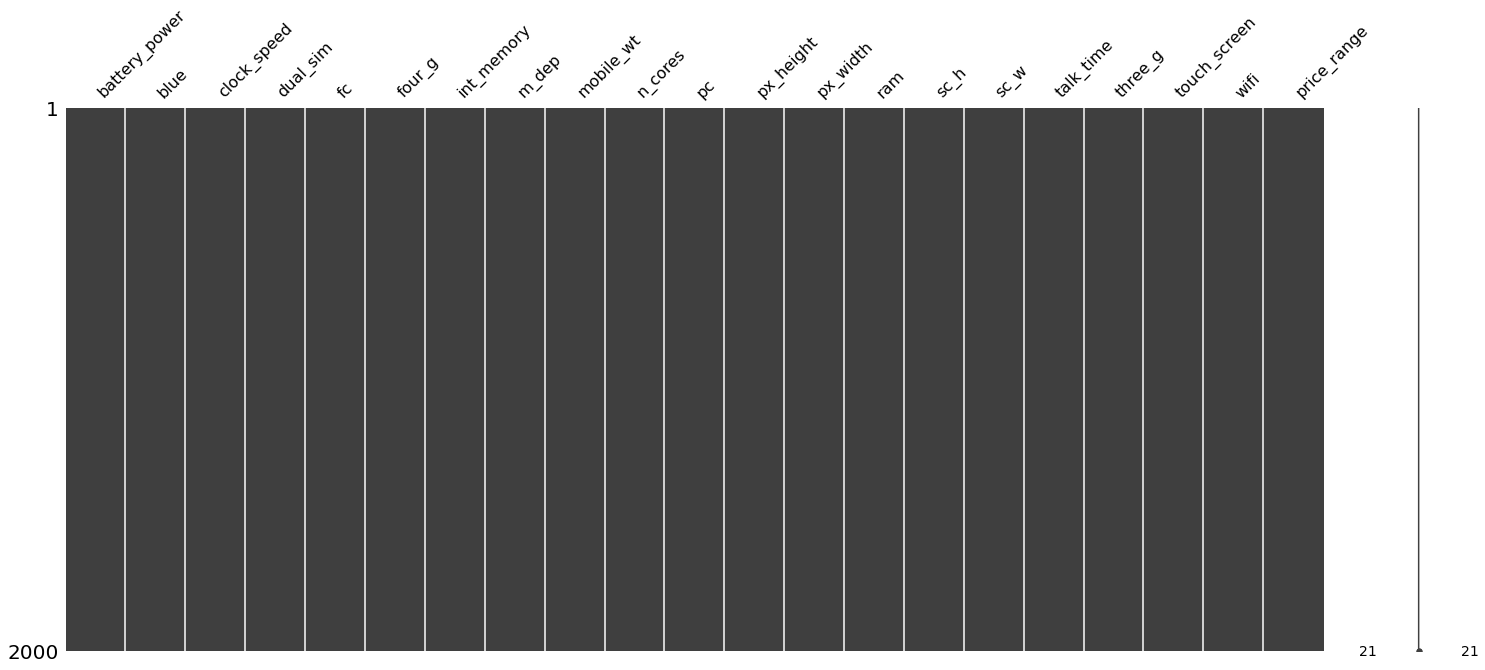

In [11]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df)

We can see that there are no missing values in our dataset

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

Here looking carefully we find that:

* Minimum value of px_height and sc_w is 0.0 which is not possible.

Hence this columns must be handled.

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for col in df.columns:
  print("Column:",col,"\n",df[col].unique())
  print('--'*70)

Column: battery_power 
 [ 842 1021  563 ... 1139 1467  858]
--------------------------------------------------------------------------------------------------------------------------------------------
Column: blue 
 [0 1]
--------------------------------------------------------------------------------------------------------------------------------------------
Column: clock_speed 
 [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
--------------------------------------------------------------------------------------------------------------------------------------------
Column: dual_sim 
 [0 1]
--------------------------------------------------------------------------------------------------------------------------------------------
Column: fc 
 [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
------------------------------------------------------------------------------------------------------------------------------

Let's take ['blue' , 'dual_sim' , 'four_g' , 'three_g' , 'touch_screen' , 'wifi' , 'n_cores'] as categorical columns.

In [15]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

## 3. ***Data Wrangling***

### Data Wrangling Code

In [5]:
#Finding records which have min px_height = 0.0
print(df[df['px_height']==0.0])

#replacing with median of the columns
df['px_height'][df[df.px_height == 0].index] = df.px_height.median()

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1481    0.1         99        4  ...          0      1987  3692    13     0   
1933    0.6        154        8  ...          0       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1  

[2 rows x 21 columns]


In [17]:
df[df['px_height']==0.0].shape

(0, 21)

Now there are no records with 0 pixel_height.

In [6]:
#finding records with sc_w=0.0
print(df[df['sc_w']==0.0])

#replacing with median of the columns
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.median()

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
12             1815     0          2.8         0   2       0          33   
24              503     0          1.2         1   5       1           8   
33             1310     1          2.2         1   0       1          51   
42             1253     1          0.5         1   5       1           5   
50             1547     1          3.0         1   2       1          14   
...             ...   ...          ...       ...  ..     ...         ...   
1918            772     0          1.0         1   0       1          23   
1920            591     1          0.5         1   1       1          16   
1946            590     1          1.2         1   0       0          32   
1954            686     1          2.7         1   0       0          36   
1981           1454     0          2.6         0   8       0           6   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
12      

In [19]:
#checking for screen width with 0 values
df[df['sc_w']==0.0].shape

(0, 21)

There are no rows in the dataset that contains screen width 0.

In [7]:
#converting screen width, height and depth to inch
'''
    Since generally screen width and height are given in inches
'''
cols=['sc_h','sc_w','m_dep']
for col in cols:
  df[col]=df[col]/2.54

In [8]:
#creating categorical columns list
cat_cols=['blue' , 'dual_sim' , 'four_g' , 'three_g' , 'touch_screen' , 'wifi' , 'n_cores' , 'price_range']

#creating numerical columns
num_cols=[col for col in df.columns if col not in cat_cols]
num_cols

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

### What all manipulations have you done and insights you found?

* Since I found that screen width and pixel height with values 0 which cannot be true. Hence replaced them with median of the respective column.

* Also screen height, width and depth are given in centimeters but generally these specifications are provided in inches. Hence converted these columns to inches.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##Univariate analysis

#### Chart - 1

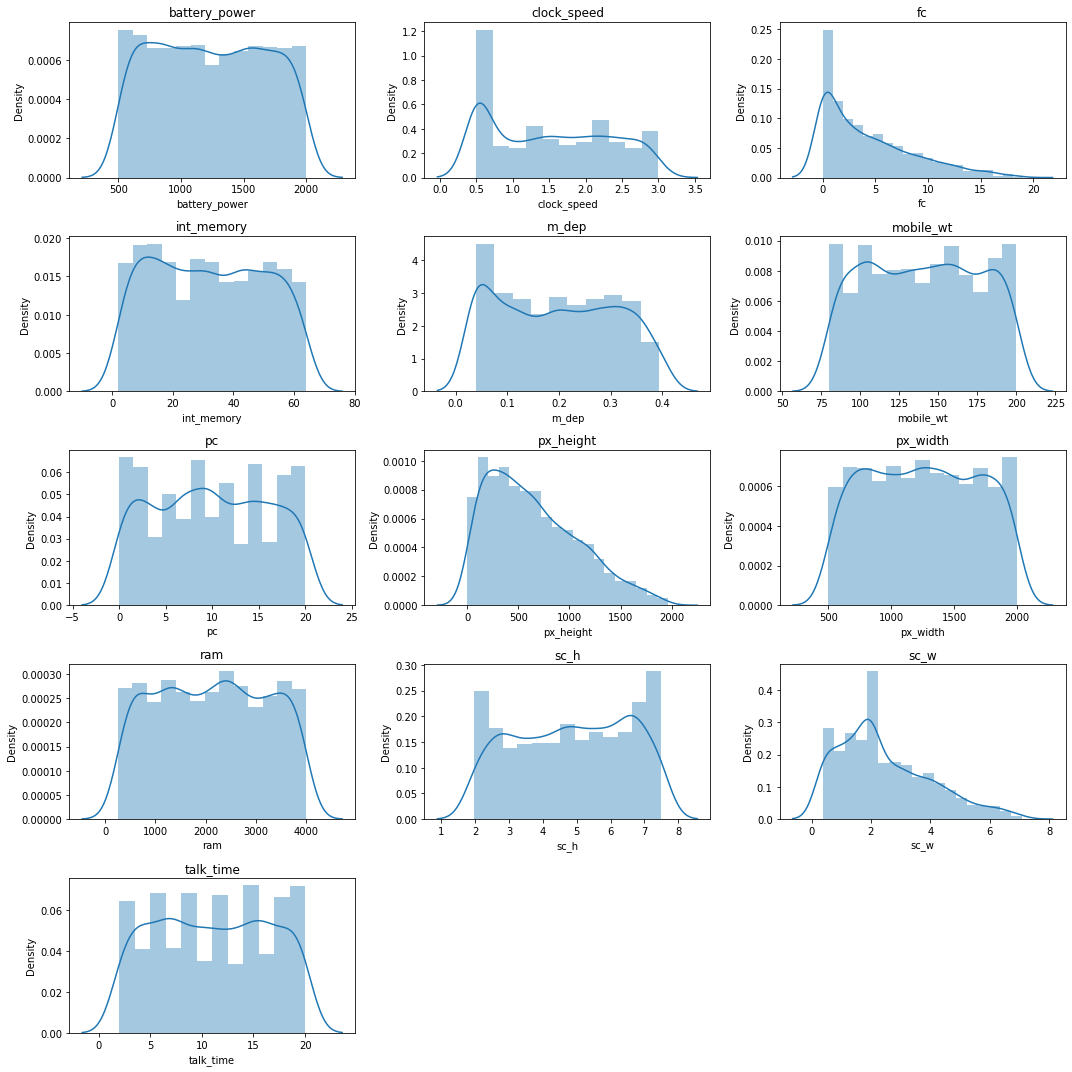

In [22]:
#Visualizing the distribution of numerical features

#Distribution plot
n=1
plt.figure(figsize=(15,15))
for col in num_cols:
   plt.subplot(5,3,n)
   n+=1
   sns.distplot(df[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of independent variables, distribution plot is best to be cinsidered.

##### 2. What is/are the insight(s) found from the chart?

Clock speed , front camera , pixel height and screen width are right skewed distributed.

other variables are not skewed.

#### Chart - 2

In [23]:
#function for plotting countplot of categorical variables
def countplot_(feature):
  y=pd.DataFrame(df[feature].value_counts().reset_index())
  y.columns=['Count',feature]
  plt.figure(figsize=(7,6))
  df[feature].value_counts().plot(kind='barh',color="lightgreen")
  plt.legend()

  plt.show()

Column: blue 
 0    1010
1     990
Name: blue, dtype: int64


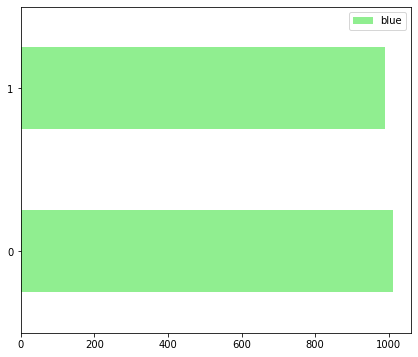

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Column: dual_sim 
 1    1019
0     981
Name: dual_sim, dtype: int64


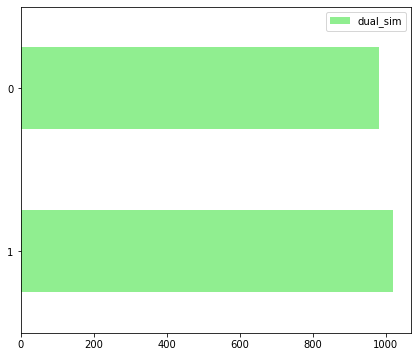

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Column: four_g 
 1    1043
0     957
Name: four_g, dtype: int64


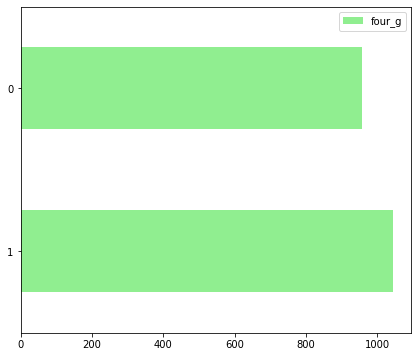

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Column: three_g 
 1    1523
0     477
Name: three_g, dtype: int64


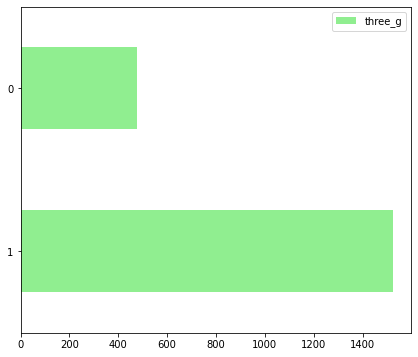

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Column: touch_screen 
 1    1006
0     994
Name: touch_screen, dtype: int64


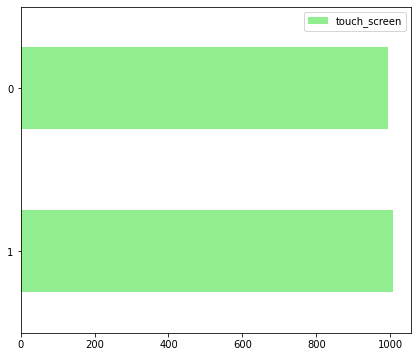

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Column: wifi 
 1    1014
0     986
Name: wifi, dtype: int64


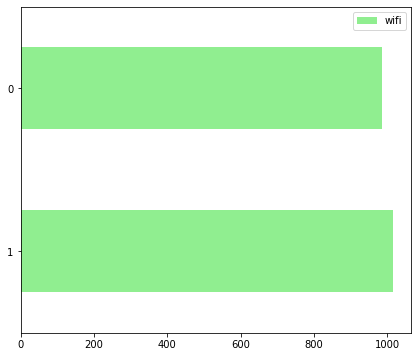

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Column: n_cores 
 4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64


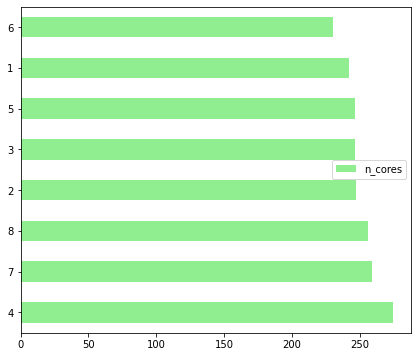

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Column: price_range 
 1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


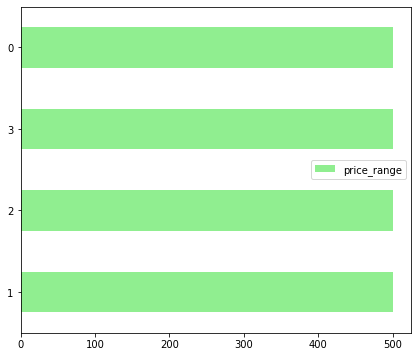

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [24]:
#creating categorical columns list
cat_cols=['blue' , 'dual_sim' , 'four_g' , 'three_g' , 'touch_screen' , 'wifi' , 'n_cores' , 'price_range']

#count of unique values for these columns
for col in cat_cols:
  #new_df
  print("Column:",col,"\n",df[col].value_counts())
  countplot_(col)
  print('--'*80)

##### 1. Why did you pick the specific chart?

To see the count of each of the categorical variables in the given dataset.

##### 2. What is/are the insight(s) found from the chart?

INFERENCES:

Out of 2000 mobile phones:

1. 1010 have bluethooth while 990 do not have bluetooth.

2. 1019 mobile phones are dual sim while 981 are single sim.

3. 1043 are 4g devices while 957 devices do not support 4g

4. 1523 are 3g devices while in 477 devices 3g is not supported

5. 1006 are touch screen phones while 994 are keypad phones.

6. 1014 devices support wifi while 986 devices do not support wifi.

7. All the processors have equal number of devices.

8. Price_range have equal distribution (each price range  from low to very high have equal numbers of records). Hence it is perfectly balanced dataset.

#### Chart - 3

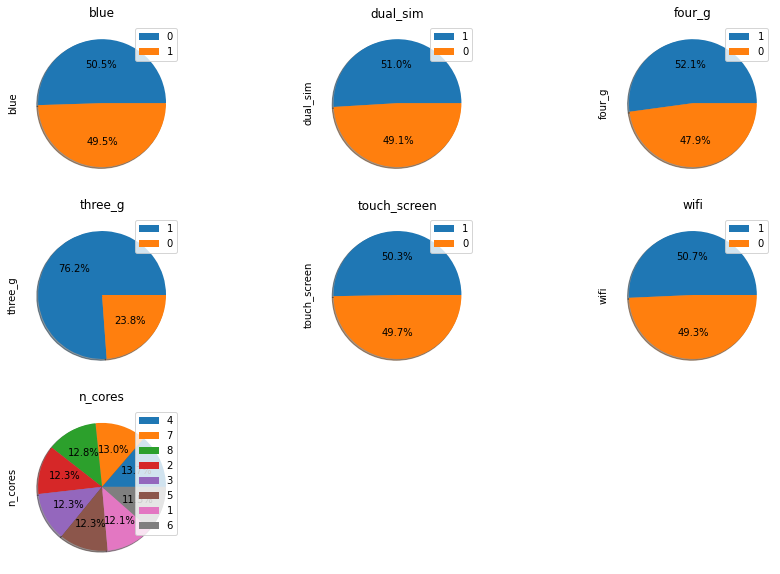

In [25]:
#To see the distribution of several categorical columns 

#creating categorical columns list
cat_cols=['blue' , 'dual_sim' , 'four_g' , 'three_g' , 'touch_screen' , 'wifi' , 'n_cores']

plt.figure(figsize=(15,10))
j=1
for i in cat_cols:
  plt.subplot(3, 3, j)
  j+=1
  df[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labeldistance=None)
  plt.legend()
  plt.title(i)

##### 1. Why did you pick the specific chart?

To see the distribution of categorical columns using pie chart.

##### 2. What is/are the insight(s) found from the chart?

INFERENCES:

* Almost 50% devices has bluetooth.

* Almost 50% of the devices is dual sim

* 52% devices support 4g

* More than 75% devices support 3g

* Half of the phones are touch screen.

* Wifi is avaiilable on half of the devices.

* No of cores are eually distributed, from 12-13% for all cores.

#### Chart - 4

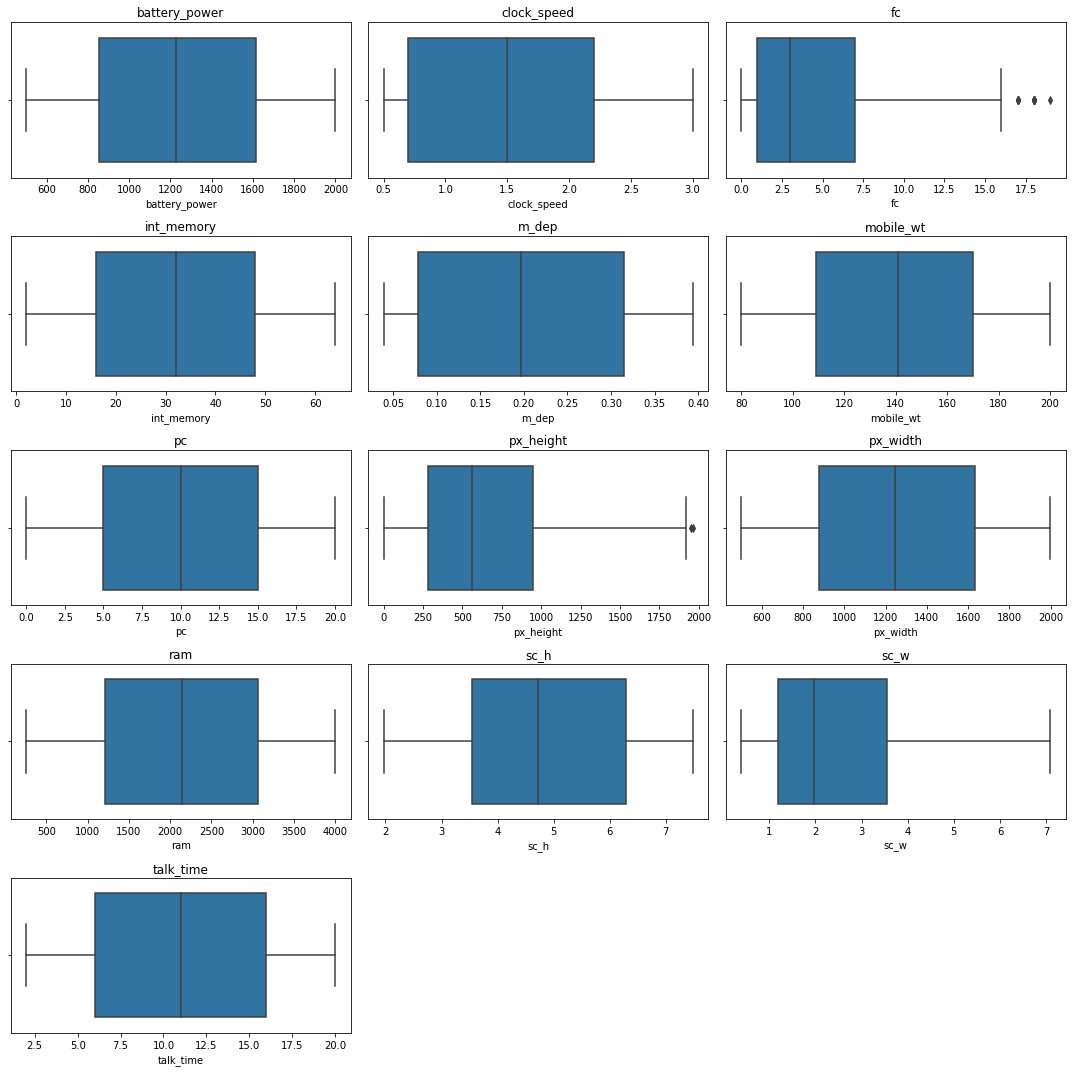

In [26]:
#checking for outliers for numerical columns
n=1
plt.figure(figsize=(15,15))
for col in num_cols[:]:
  plt.subplot(5,3,n)
  n+=1
  sns.boxplot(df[col])
  plt.title(col)
  plt.tight_layout()  

Here outliers are not seen much. 

##Bivariate analysis

#### Chart - 5

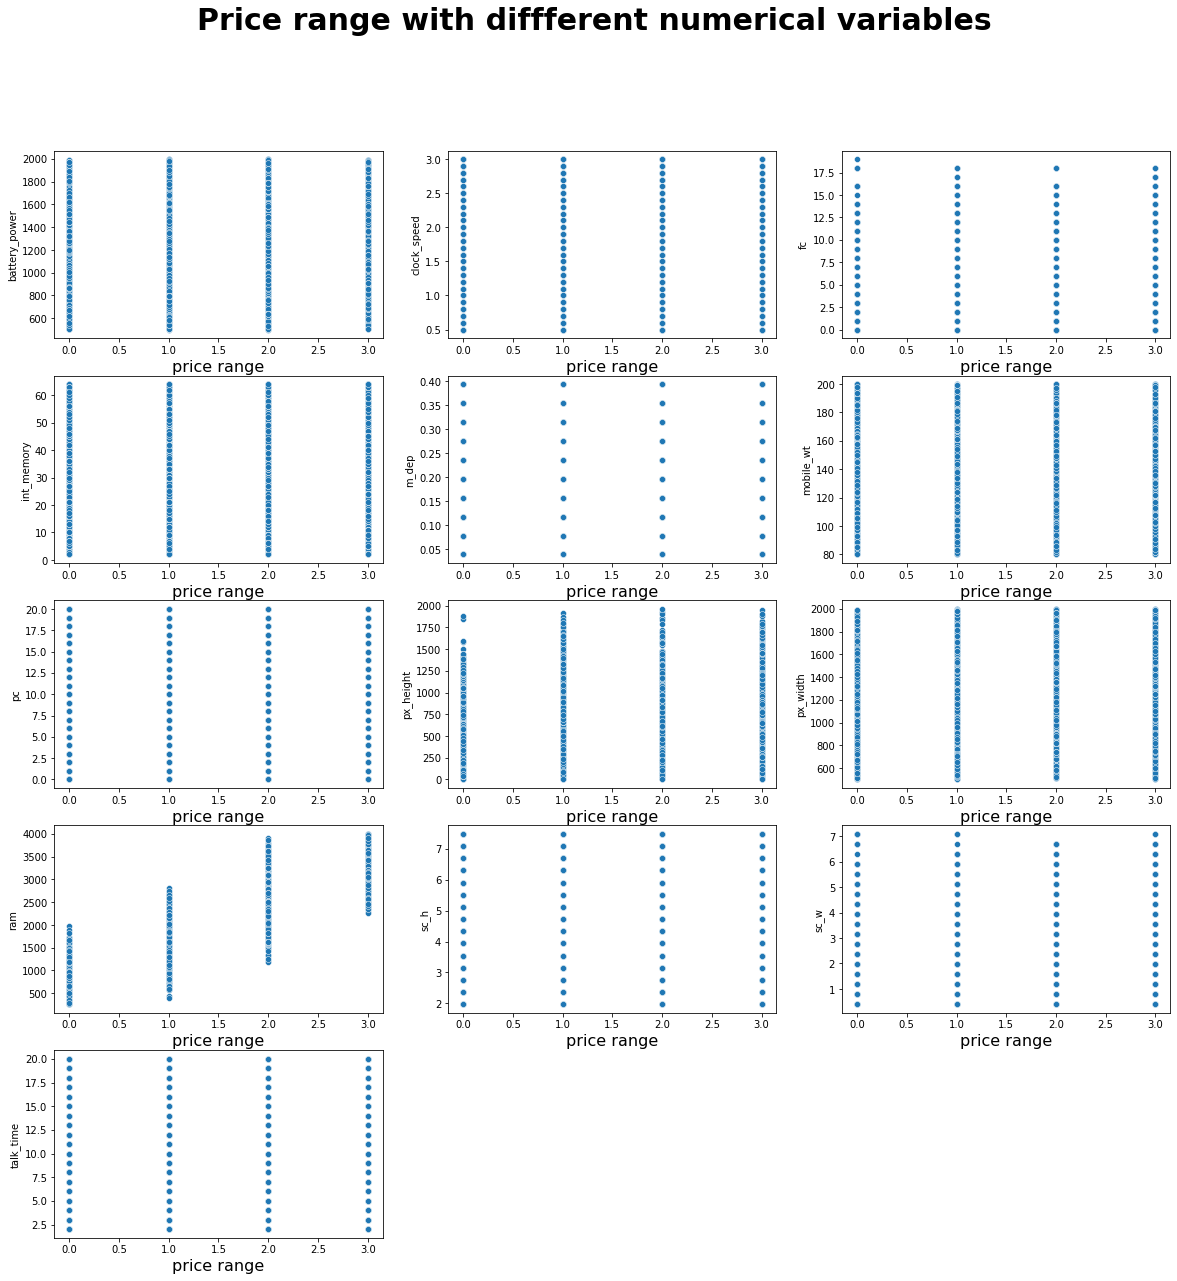

In [27]:
#See the different numerical columns and price range
plt.figure(figsize=(20,20))
for x,y in zip(range(1,len(num_cols)+1),num_cols):
  plt.subplot(5,3,x)
  sns.scatterplot('price_range',y,data=df,palette="Set1")
  plt.xlabel('price range',fontsize=16)
  plt.suptitle('Price range with diffferent numerical variables',fontsize=30,weight='bold')


##### 1. Why did you pick the specific chart?

To see how the various numerical features affect the price range. 

##### 2. What is/are the insight(s) found from the chart?

* It is clearly visible that battery power is same for all the price range. Hence it can be concluded that battery power does not affect the price much.

* Also price range is almost same for other variables except RAM and pixel height (littl variation is seen .

* As seen from scaterplot as RAM increases, the price range of mobile phones increases. Hence there is high correlation between price range and ram.

#### Chart - 6

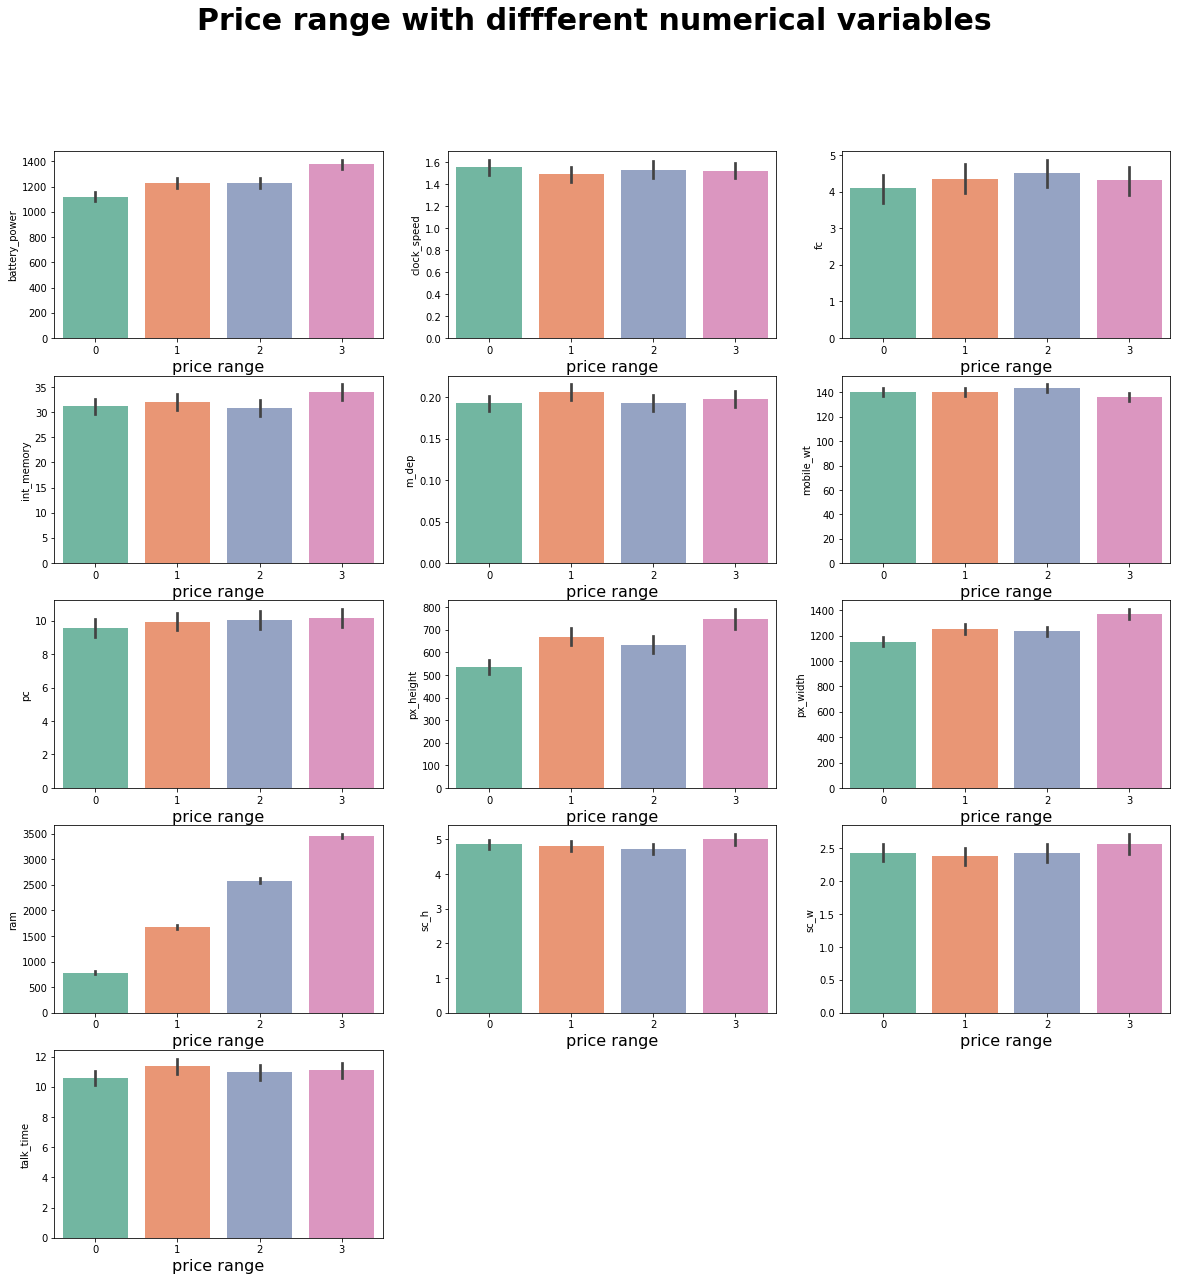

In [28]:
#See the average of different numerical columns and price range
plt.figure(figsize=(20,20))
for x,y in zip(range(1,len(num_cols)+1),num_cols):
  plt.subplot(5,3,x)
  sns.barplot('price_range',y,data=df,palette="Set2")
  plt.xlabel('price range',fontsize=16)
  plt.suptitle('Price range with diffferent numerical variables',fontsize=30,weight='bold')

##### 1. Why did you pick the specific chart?

To see the average of different numerical variables with target variables.

##### 2. What is/are the insight(s) found from the chart?

* As the price range increases the average of battery power , RAM increases.

* Price range are slightly higher for high internal memory.

* The average of other variables do not affect much on price range.

#### Chart - 7

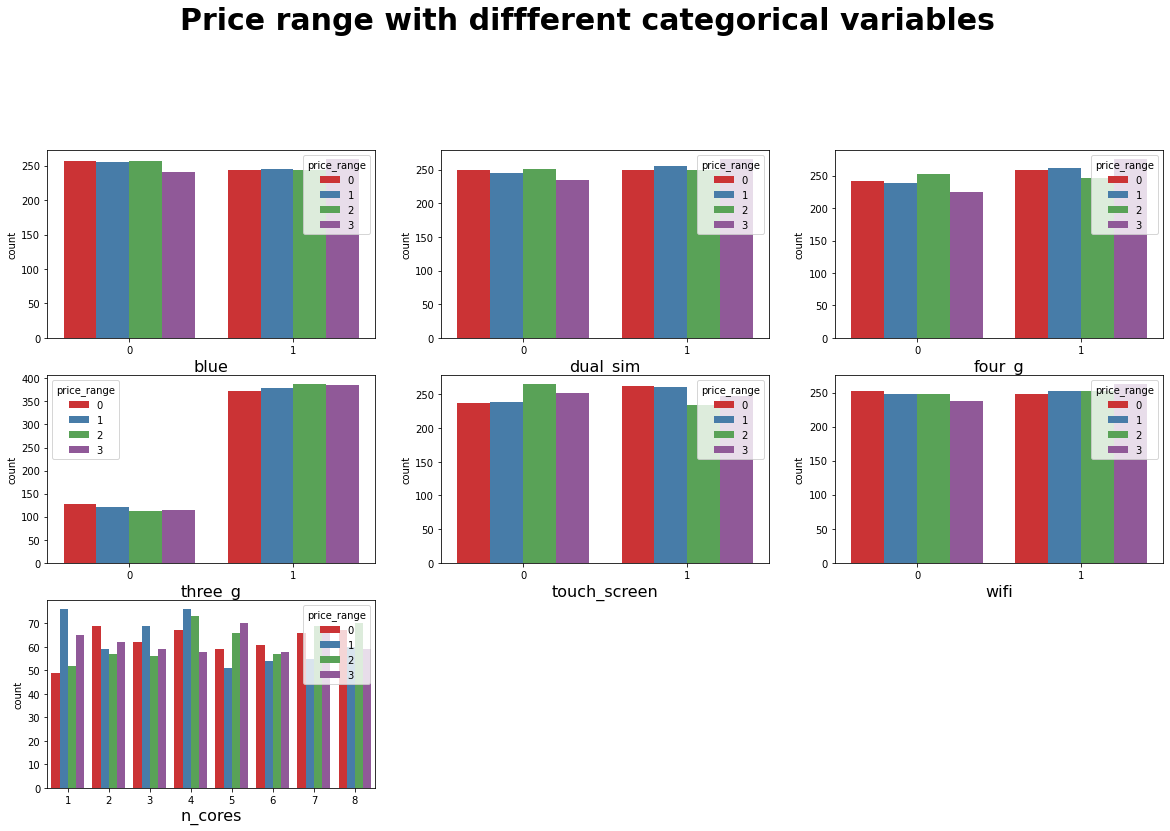

In [29]:
#See the different categorical columns and price range
plt.figure(figsize=(20,20))
for x,y in zip(range(1,len(cat_cols)+1),cat_cols):
  if y=='price_range':
    pass
  else:
    plt.subplot(5,3,x)
    sns.countplot(x=y,hue='price_range',data=df,palette="Set1")
    plt.xlabel(y,fontsize=16)
    plt.suptitle('Price range with diffferent categorical variables',fontsize=30,weight='bold')


##### 1. Why did you pick the specific chart?

Since price range is categorical feature and to see the relationship between other categorical feature and price range, I used barplot with hue as price_range.

##### 2. What is/are the insight(s) found from the chart?

* Non bluetooth mobile phones with higher price are less in number but phones with bluetooh are available in all price range.

* Phones without double sim have low price while phones with double sim are available in all price range.

* Prices of non 4g phones are lower but price of 4g phones are ranges from low to very high.

* There are larger number of 3g phones but their prices do not vary much.

* Touch screen phones are available in all price range.

* Phones with wifi facility are available in all price range.

* For differen number of cores various peice range is available.

#### Chart - 8

In [30]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

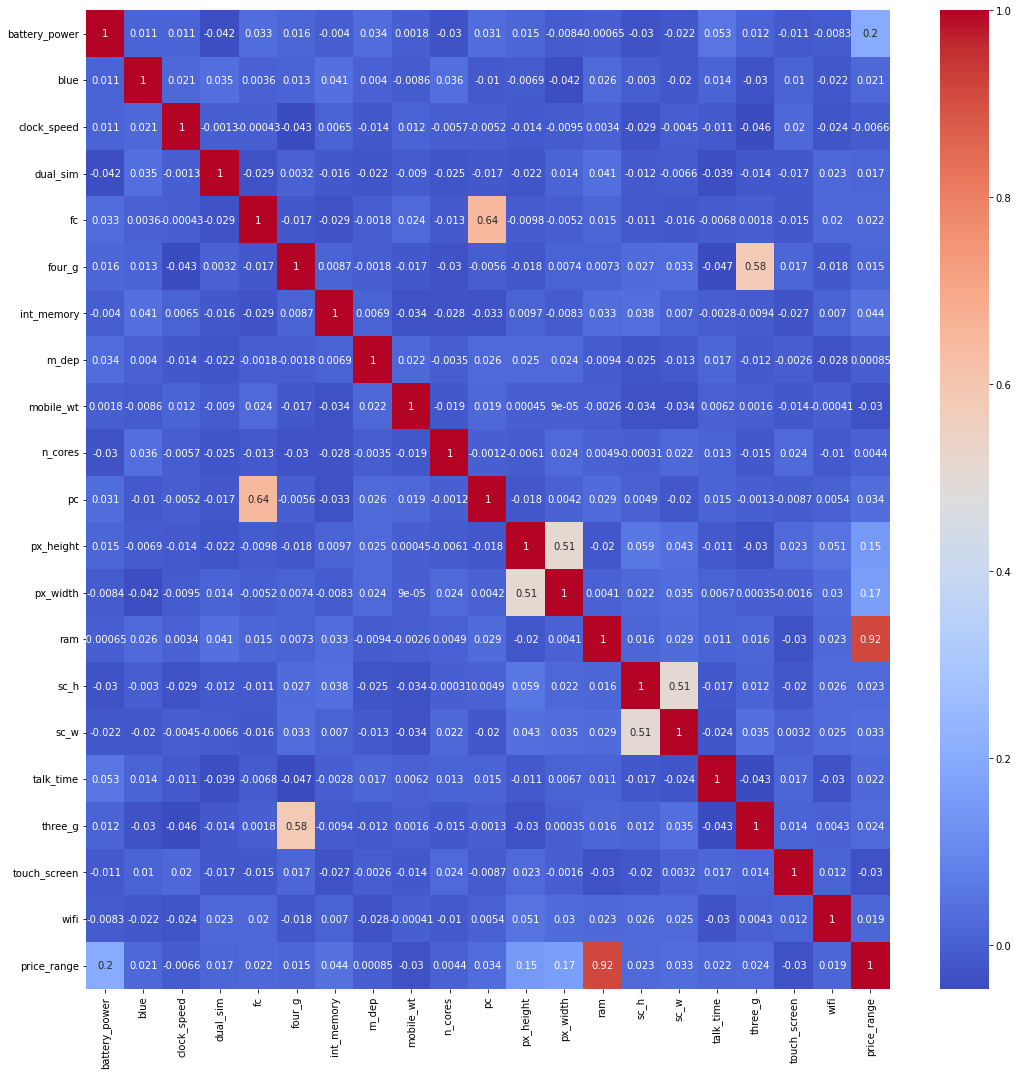

In [31]:
#Correlation between dependent and independent variables
correlation=df.corr()

plt.figure(figsize=(18,18))
sns.heatmap(correlation,cmap="coolwarm",annot=True)

##### 1. Why did you pick the specific chart?

To see the correlation between dependent and independent variables. 

##### 2. What is/are the insight(s) found from the chart?

INFERENCES:

1. Correlation of other indeendent variables with dependent variable:

* There very less correlation between price range and clock speed, mobile depth, number of cores. If they are removed result won't affect much.

* Correlation between Price range and RAM is very high, i.e., 0.92, which is a good sign for analysis.

* The correlation between target variable and other remaining variables is also less but can be considered for analysis.

2. Correlation between independent variables:

* Clearly correlation between four_g and three_g is moderate. That means that they are somehow related.

* The correlation between pixel height and pixel width is 0.51 which means some correlation between pixel height and pixel width.

* There is high correlation between primary camera and front camera which means that if primary camera is good then front camera is also good.

* The correlation between other independent variables is very less which is good for analysis.

#### Chart - 9

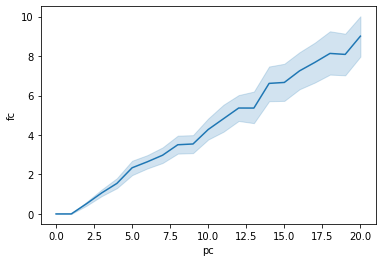

In [32]:
# Chart - 9 visualization code
sns.lineplot(x='pc',y='fc',data=df)

##### 1. Why did you pick the specific chart?

On finding the correlation between primary camera anf front camera, to draw out relationship betwen them, I have used lineplot.

##### 2. What is/are the insight(s) found from the chart?

As the primary camera quality increases, there is increase in front camera quality. Hence there is high chance that if primary camera quality is godd then front camera quality is also good.

#### Chart - 10

In [33]:
#three_g and four_g
threeg_fourg=pd.DataFrame(df.groupby(['three_g','four_g'],as_index=False)['wifi'].count())
df_3g_4g_count=threeg_fourg.pivot('three_g','four_g','wifi').fillna(0).reset_index()
df_3g_4g_count.columns=['three_g','4g_no','4g_yes']
df_3g_4g_count


three_g  4g_no  4g_yes
0        0  477.0     0.0
1        1  480.0  1043.0

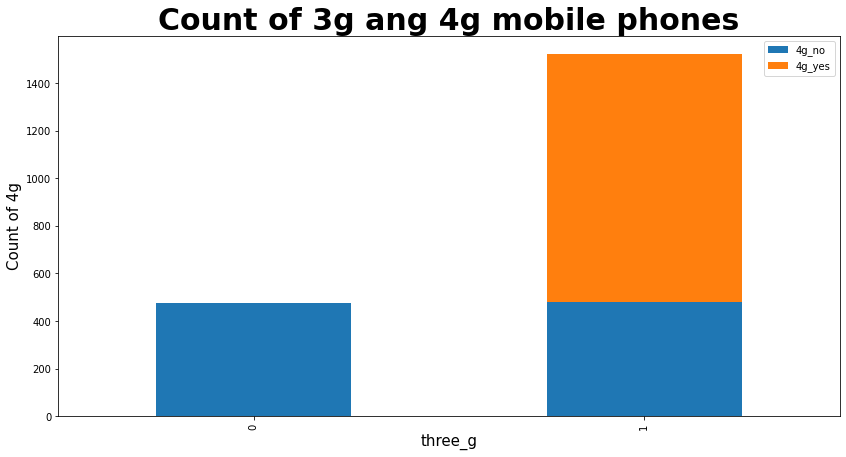

In [34]:
# Visualizing through stacked bar chart
df_3g_4g_count.set_index('three_g').plot(kind='bar', stacked=True, figsize=(14,7))
plt.xlabel("three_g", fontsize=15)
plt.ylabel("Count of 4g", fontsize=15)
plt.title("Count of 3g ang 4g mobile phones",fontsize=30,weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

To see the count of 3g with 4g phones and compare them.

##### 2. What is/are the insight(s) found from the chart?

INFERENCE:

We can infer that when the device is not 3g then there is no record that it is 4g. Hence it is neccesary for a 4g mobile phone that it must be 3g.

#### Chart - 11

In [36]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

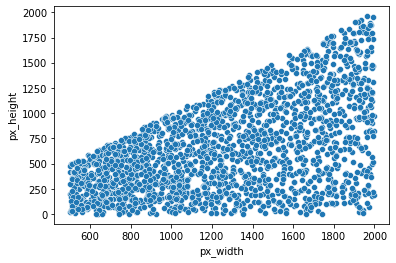

In [9]:
# Chart - 11 visualization code
#pixwel height and pixel width
sns.scatterplot(x='px_width',y='px_height',data=df)

##### 1. Why did you pick the specific chart?

To check the relationship between pixel height and pixel width.

##### 2. What is/are the insight(s) found from the chart?

There is some relationship between pixel height and pixel width. Hence if there is low pixel pixel width then pixel height can be low but cannot be high. There can be lower pixel heights at high pixel width.

#### Chart - 12 - Pair Plot 

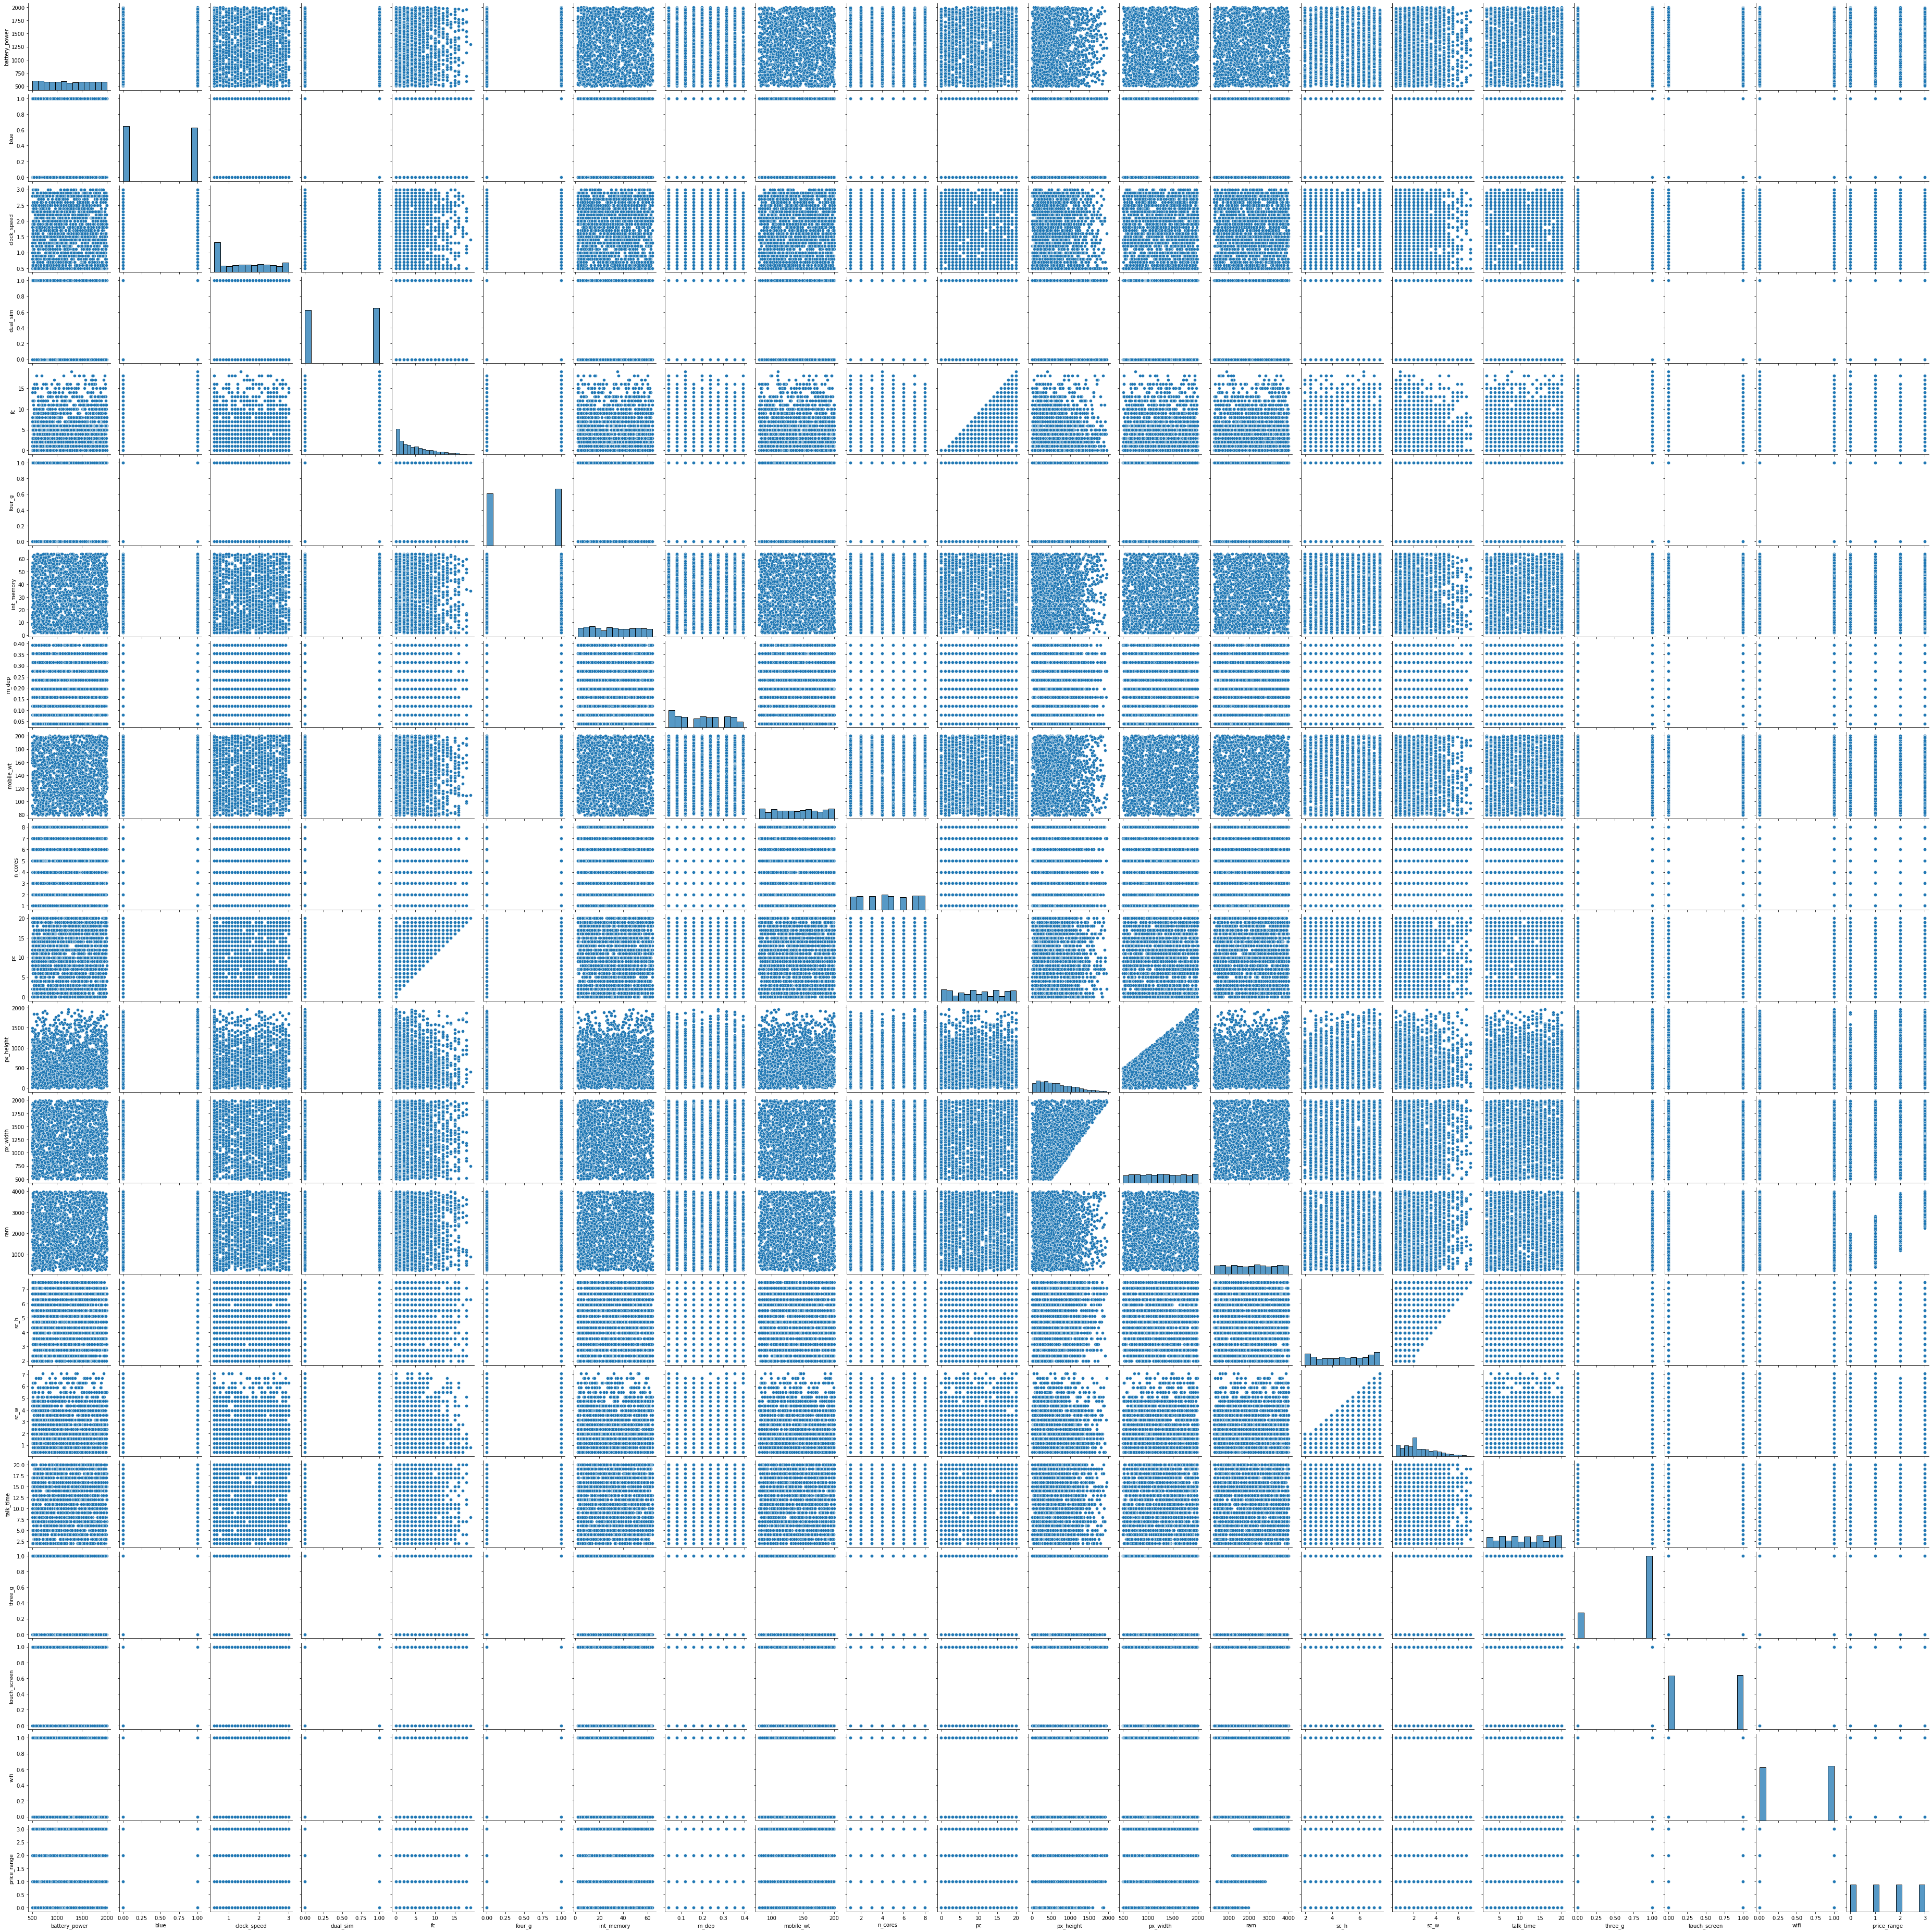

In [10]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

To see the visual relation between all the variables.

##### 2. What is/are the insight(s) found from the chart?

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [11]:
# Handling Missing Values & Missing Value Imputation
'''
Since there are no null values in the dataset. Hence we don't need to handle null values
'''

"\nSince there are no null values in the dataset. Hence we don't need to handle null values\n"

### 2. Handling Outliers

In [20]:
# Handling Outliers & Outlier treatments
'''There are not much outliers seen in the df['fc']set except in front camera(fc)'''

q1 = df['fc'].quantile(0.25)  #first quartile
q3 = df['fc'].quantile(0.75)  #third quartile

#Finding the interquantile range
iqr=q3-q1

#finding the upper limit and lower limit
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(f'upper limit is {upper} annd lower limit is {lower}')

In [46]:
#count of upper and lower outliers in the dataframe
lower_fc=df['fc'].loc[(df['fc'] < lower)]
upper_fc=df['fc'].loc[(df['fc'] > upper)]
print("Lower outliers are {}".format(len(lower_fc)))
print("Upper outliers are {}".format(len(upper_fc)))

Lower outliers are 0
Upper outliers are 18


There are no lower outliers just upper outliers. Hence I'll replace it with median of the column.

In [49]:
#Replacing outliers with median of the column
fc_med=df['fc'].median()
df.loc[df['fc'] > upper, 'fc']=fc_med

### 3. Categorical Encoding

In [50]:
# Encode your categorical columns
'''
Since categorical variables are encoded already, there is no need of encoding
'''

'\nSince categorical variables are encoded already, there is no need of encoding\n'

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

###A. display_size
The size of a screen is usually described by the length of its diagonal, which is the distance between left upper corner and right bottom corner, usually in inches.

In [54]:
#Creating new feature based on screen width and screen height
df['display_size']=np.sqrt(((df['sc_h']**2) + (df['sc_w']**2)))

###B. screen_resolution

Resolution refers to the number of pixels on display or in a camera sensor. To get the pixel count, multiply pixel height with pixel width.

In [58]:
#creating new feature based on pixel height and pixel width
df['screen_resolution']=df['px_height']*df['px_width']

#### 2. Feature Selection

1. Since I have created new features with combination of other features, so it's better to drop the orignal features.

In [61]:
#droping the used columns
df.drop(['sc_h','sc_w','px_height','px_width'],axis=1,inplace=True)

2. Also as already seen, the correlation between target variable (price_range) and clock speed, mobile depth, number of cores is very very less. Hence dropping them is a better option.

In [67]:
df.drop(['clock_speed','m_dep','n_cores'],axis=1,inplace=True)

3. Checking for multicollinearity

In [69]:
# function to calculate Multicollinearity

'''Multicollinearity means there is any relationship between independent variables.
If it is so, then linear model may not give useful results. Hence it needs to be removed.'''

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
# multicollinearity result

calc_vif(df[[i for i in df.columns if i not in ['price_range']]])

variables        VIF
0       battery_power   7.758120
1                blue   1.964680
2            dual_sim   1.997185
3                  fc   3.237215
4              four_g   3.189455
5          int_memory   3.895422
6           mobile_wt  11.580868
7                  pc   5.809099
8                 ram   4.621045
9           talk_time   4.743299
10            three_g   6.139648
11       touch_screen   1.970459
12               wifi   2.011525
13       display_size   7.609342
14  screen_resolution   2.179702

Since VIF is nearly euqal to 10 for the ariables. Hence we can consider it . So there is no case of multicollinearity in the dataset. 

In [68]:
df.columns

Index(['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory',
       'mobile_wt', 'pc', 'ram', 'talk_time', 'three_g', 'touch_screen',
       'wifi', 'price_range', 'display_size', 'screen_resolution'],
      dtype='object')

##### What all feature selection methods have you used  and why?

* Creating new features from combination of other given features helps in reducing correlation between independent variables. Hence these columns can be dropped.

* If the independent variables do not have strong relationship with target variable, then analysis may not give us good result. Hence removed these uncorrelated features.

* There is no multicollinearity among variables.

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 4. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 5. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 6. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***